# Control of the number of origin of replications

Go to [Index](response_Witz2019_index.ipynb).

Witz and colleagues described the numerical implementation of their model in the *Material and Methods*. In particular, it is indicated that:
> [...] a series of 500 cells is initialized with all required parameters: initial length $L_0$ taken from the birth length  distribution, $\lambda = P(\lambda)$, number of origins $n_\text{ori}$, and the two adders $d\Lambda_{ib} = P(d\Lambda_{ib})$ and $d\Lambda_{if} = P(d\Lambda_{if})$ whose counters are starting at 0. The exact initialization is not crucial as the system relaxes to its equilibrium state after a few generations.

In contrast to that statement, we argue that the steady-state cell size is determined by the number of origins at initialization, namely $n_\text{ori}$. The theoretical reasons have been given [previously](response_Witz2019_index.ipynb). Here we illustrate this by performing simulations with different values for $n_\text{ori}$. We will show that in the double-adder model from Witz and colleagues, the number of origin of replications crucially depends on this initialization. By contrast, in the model proposed by Si & Le Treut and colleagues, the number of origins at steady-state doesn't depend on the initial condition and is determined by the model parameters. We recall the parameters of each model in the table below:

model | parameters
--- | --- 
Witz *et al.* | $\delta_{ii}$, $\delta_{id}$ and $\lambda$
Si & Le Treut *et al.* | $\delta_{ii}$, $\Delta_{d}$ and $\lambda$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, re, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

import sys
sys.path.append('code')
from functions_response import plot_replication_origins, plot_overlay_sd

In [3]:
# create/declare export directory for figures
fig_dir = os.path.join('figures')
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)
    
# create variables for the path to simulation files
dir_simu = 'simulations'
if not os.path.isdir(dir_simu):
    raise ValueError("Directory doesn't exist:", dir_simu)

In [4]:
# Load the simulation files
## selection parameters
nice_colors = ['darkblue', 'darkgreen', 'darkred']
names = ['glycerol','glucose','glucose8aa','glycerolauto']
simu_suffixes = ['nori1_N1T100000', 'nori2_N1T100000', 'nori4_N1T100000']
patrn = '.*nori(\d+)_N\d+T\d+_(\w+)'
simu_dict = {}

In [5]:
## loading loops
for name in names:
    print("Loading simulation results for condition: {:s}...".format(name))
    simu_dict[name] = {}
    sub_dict = simu_dict[name]
    sub_dict['GW'] = {}
    sub_dict['FSGLT'] = {}
    
    color_iter = iter(nice_colors)
    # load simulations 
    for simu_suf in simu_suffixes:
        color = next(color_iter)
        for simu_type in sub_dict.keys():
            fname = "{:s}_{:s}_{:s}.pkl".format(name, simu_suf, simu_type.lower())
            fpath = os.path.join(dir_simu, fname)
            nori, st = re.match(patrn, fname).groups()
            nori = int(nori)
            if os.path.isfile(fpath):
                sub_dict[simu_type][nori] = {}
                sub_dict[simu_type][nori]['df'] = pd.read_pickle(fpath)
                sub_dict[simu_type][nori]['color'] = color
                sub_dict[simu_type][nori]['label']='nori = {:d}'.format(nori)

Loading simulation results for condition: glycerol...
Loading simulation results for condition: glucose...
Loading simulation results for condition: glucose8aa...
Loading simulation results for condition: glycerolauto...


## Results with the model of Witz and colleagues

In [6]:
# make the plots and save them
## parameters
simu_type = 'GW'
outputdir = os.path.join(fig_dir, 'replication_origins', simu_type)

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

## loop
for i in range(len(names)):
    name = names[i]
    ## first figure
    fig_title = 'Replication origins homeostasis'
    fig_title += ", condition: {:s}".format(name)
    fig = plot_replication_origins(simu_dict[name][simu_type], fig_title=fig_title)

    figname = "{:s}_{:s}".format(name, 'nori')
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ['.png']:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
    plt.close('all')

    ## first figure
    fig_title = 'Distribution of division size'
    fig_title += ", condition: {:s}".format(name)
    fig = plot_overlay_sd(simu_dict[name][simu_type], fig_title=fig_title)

    figname = "{:s}_{:s}".format(name, 'division_size')
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ['.png']:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
    plt.close('all')


Saved figure in figures/replication_origins/GW/glycerol_nori.png
Saved figure in figures/replication_origins/GW/glycerol_division_size.png
Saved figure in figures/replication_origins/GW/glucose_nori.png
Saved figure in figures/replication_origins/GW/glucose_division_size.png
Saved figure in figures/replication_origins/GW/glucose8aa_nori.png
Saved figure in figures/replication_origins/GW/glucose8aa_division_size.png
Saved figure in figures/replication_origins/GW/glycerolauto_nori.png
Saved figure in figures/replication_origins/GW/glycerolauto_division_size.png


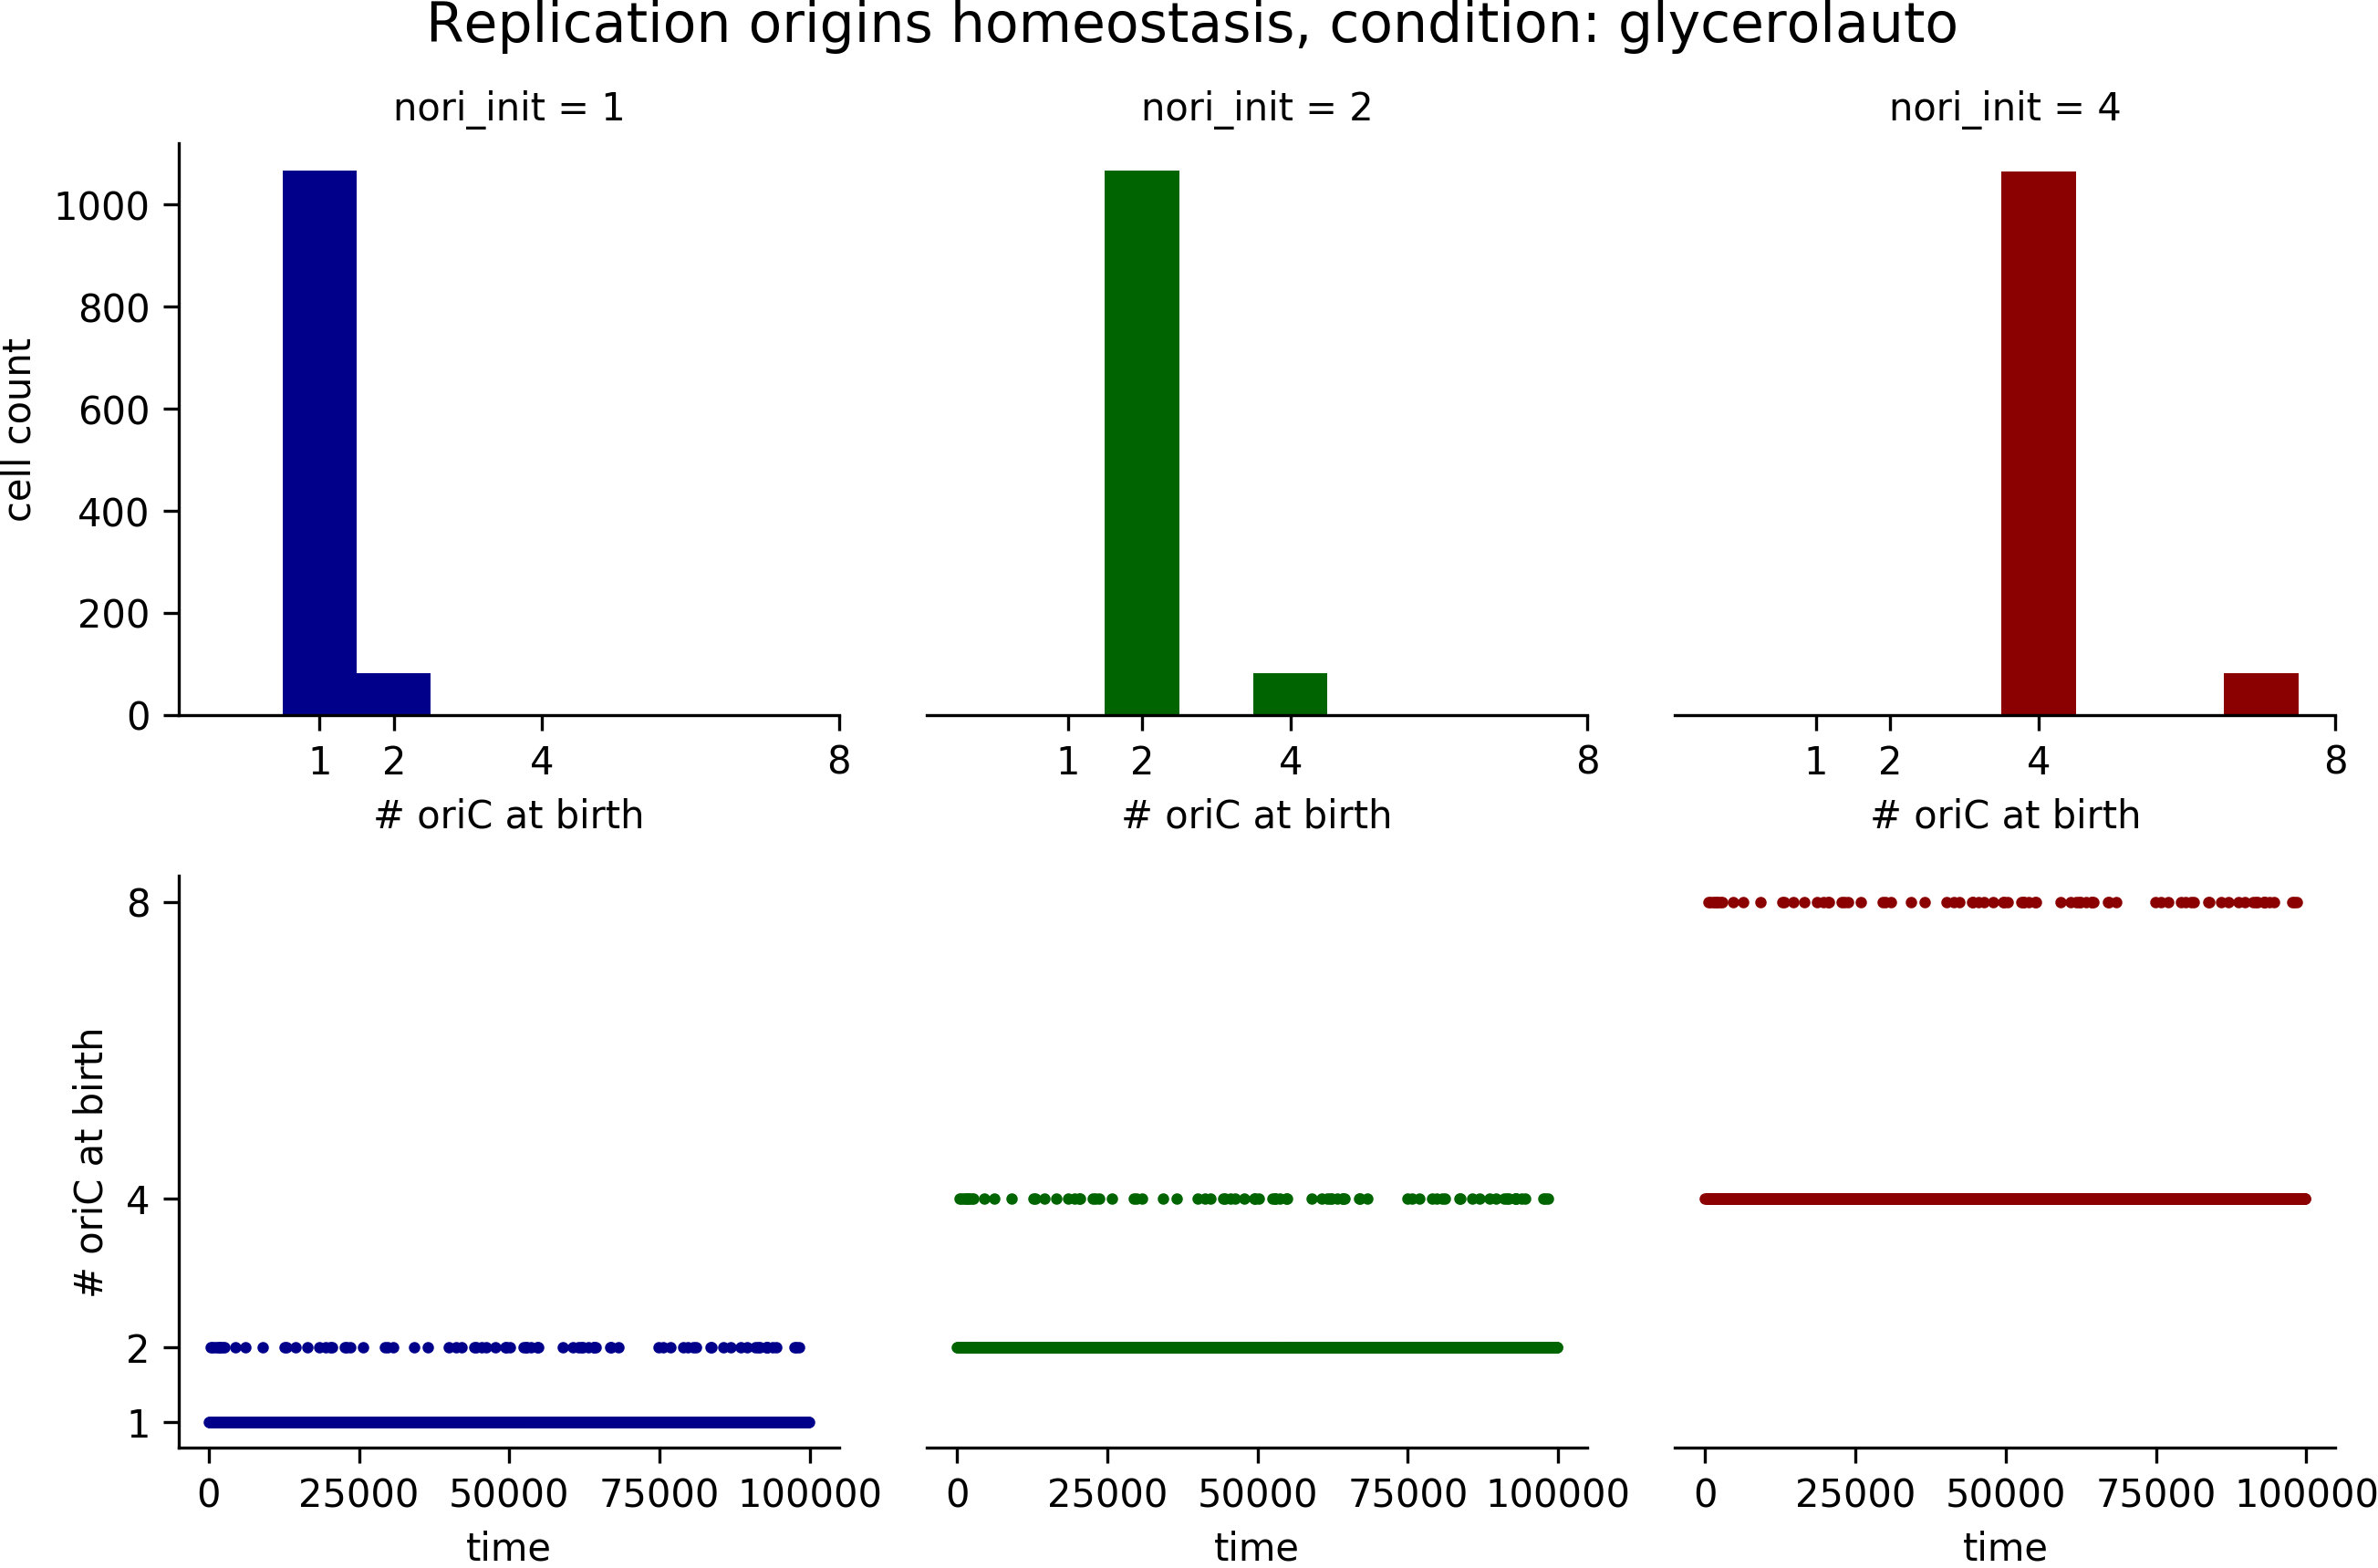

In [7]:
name = 'glycerolauto'
figname = "{:s}_{:s}".format(name, 'nori')
fpath = os.path.join(outputdir, "{:s}".format(figname)) + '.png'
# display one of the previous figures
Image(filename=fpath) 

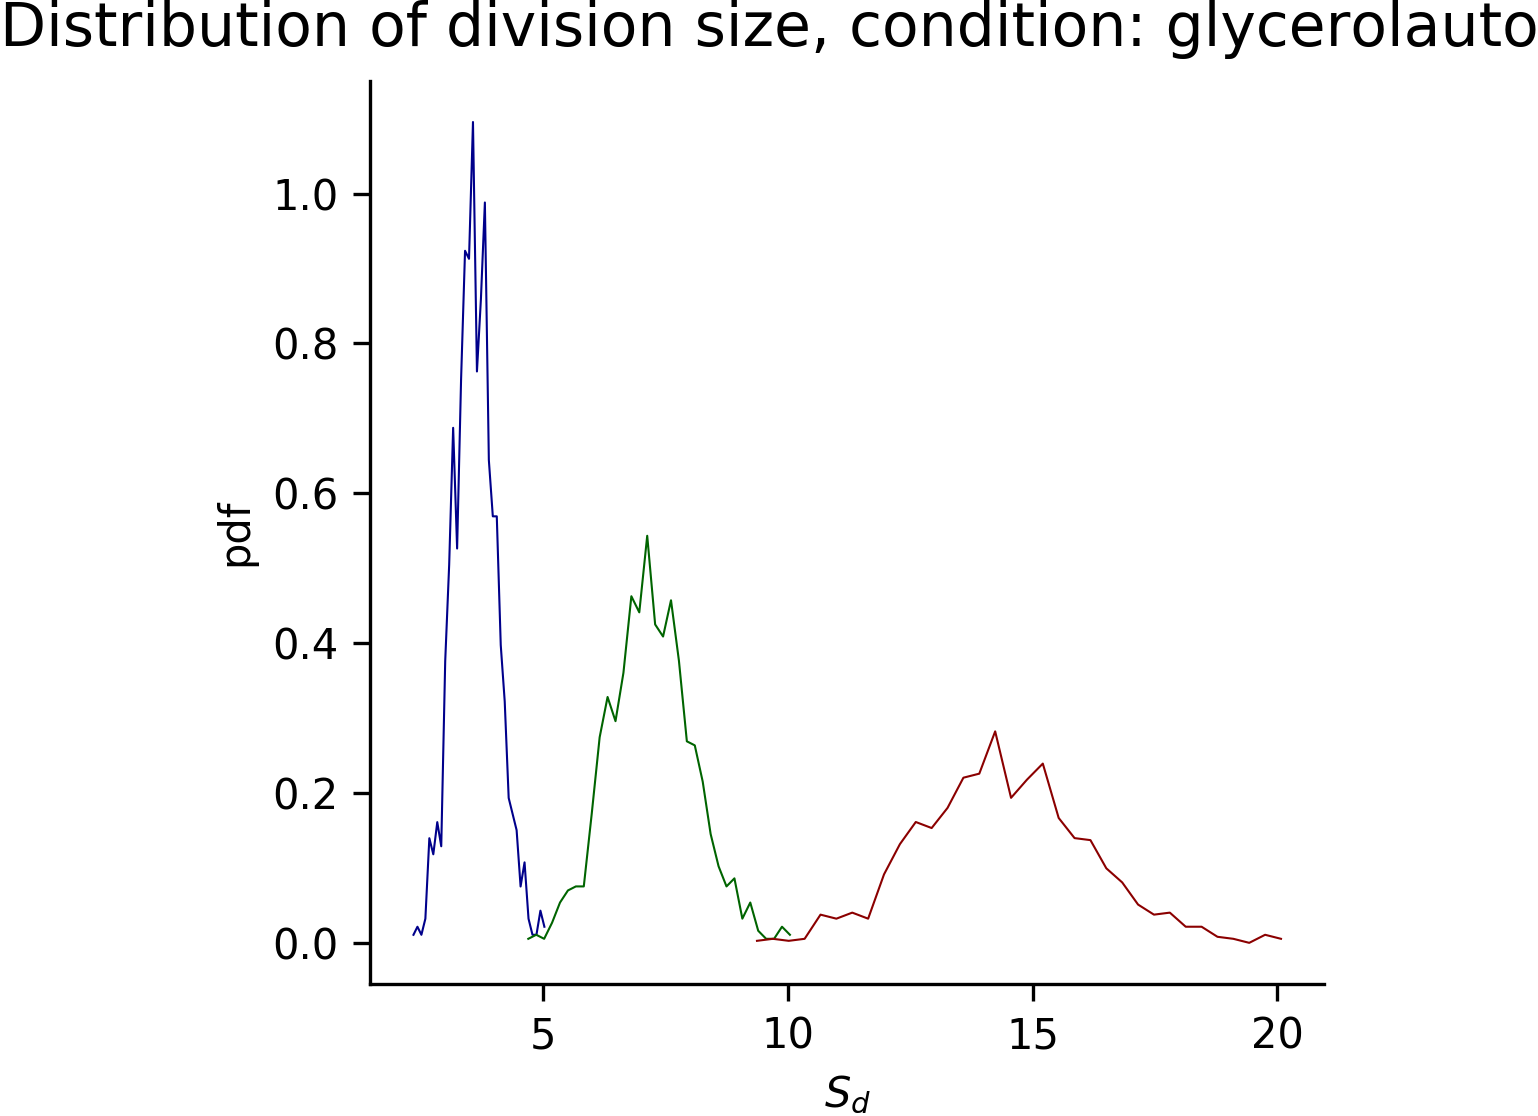

In [8]:
name = 'glycerolauto'
figname = "{:s}_{:s}".format(name, 'division_size')
fpath = os.path.join(outputdir, "{:s}".format(figname)) + '.png'
# display one of the previous figures
Image(filename=fpath) 

As can be seen in the plot above, changing the initial condition, namely the number of origin of replication in the first cell, results in a change in the steady-state. As a result the steady-state division size is scaled with $n_\text{ori}$.

## Results with the model of Si & Le Treut and colleagues

In [9]:
# make the plots and save them
## parameters
simu_type = 'FSGLT'
outputdir = os.path.join(fig_dir, 'replication_origins', simu_type)

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

## loop
for i in range(len(names)):
    name = names[i]
    ## first figure
    fig_title = 'Replication origins homeostasis'
    fig_title += ", condition: {:s}".format(name)
    fig = plot_replication_origins(simu_dict[name][simu_type], fig_title=fig_title)

    figname = "{:s}_{:s}".format(name, 'nori')
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ['.png', '.svg']:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
    plt.close('all')

    ## first figure
    fig_title = 'Distribution of division size'
    fig_title += ", condition: {:s}".format(name)
    fig = plot_overlay_sd(simu_dict[name][simu_type], fig_title=fig_title)

    figname = "{:s}_{:s}".format(name, 'division_size')
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ['.png', '.svg']:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
    plt.close('all')


Saved figure in figures/replication_origins/FSGLT/glycerol_nori.png
Saved figure in figures/replication_origins/FSGLT/glycerol_nori.svg
Saved figure in figures/replication_origins/FSGLT/glycerol_division_size.png
Saved figure in figures/replication_origins/FSGLT/glycerol_division_size.svg
Saved figure in figures/replication_origins/FSGLT/glucose_nori.png
Saved figure in figures/replication_origins/FSGLT/glucose_nori.svg
Saved figure in figures/replication_origins/FSGLT/glucose_division_size.png
Saved figure in figures/replication_origins/FSGLT/glucose_division_size.svg
Saved figure in figures/replication_origins/FSGLT/glucose8aa_nori.png
Saved figure in figures/replication_origins/FSGLT/glucose8aa_nori.svg
Saved figure in figures/replication_origins/FSGLT/glucose8aa_division_size.png
Saved figure in figures/replication_origins/FSGLT/glucose8aa_division_size.svg
Saved figure in figures/replication_origins/FSGLT/glycerolauto_nori.png
Saved figure in figures/replication_origins/FSGLT/glyc

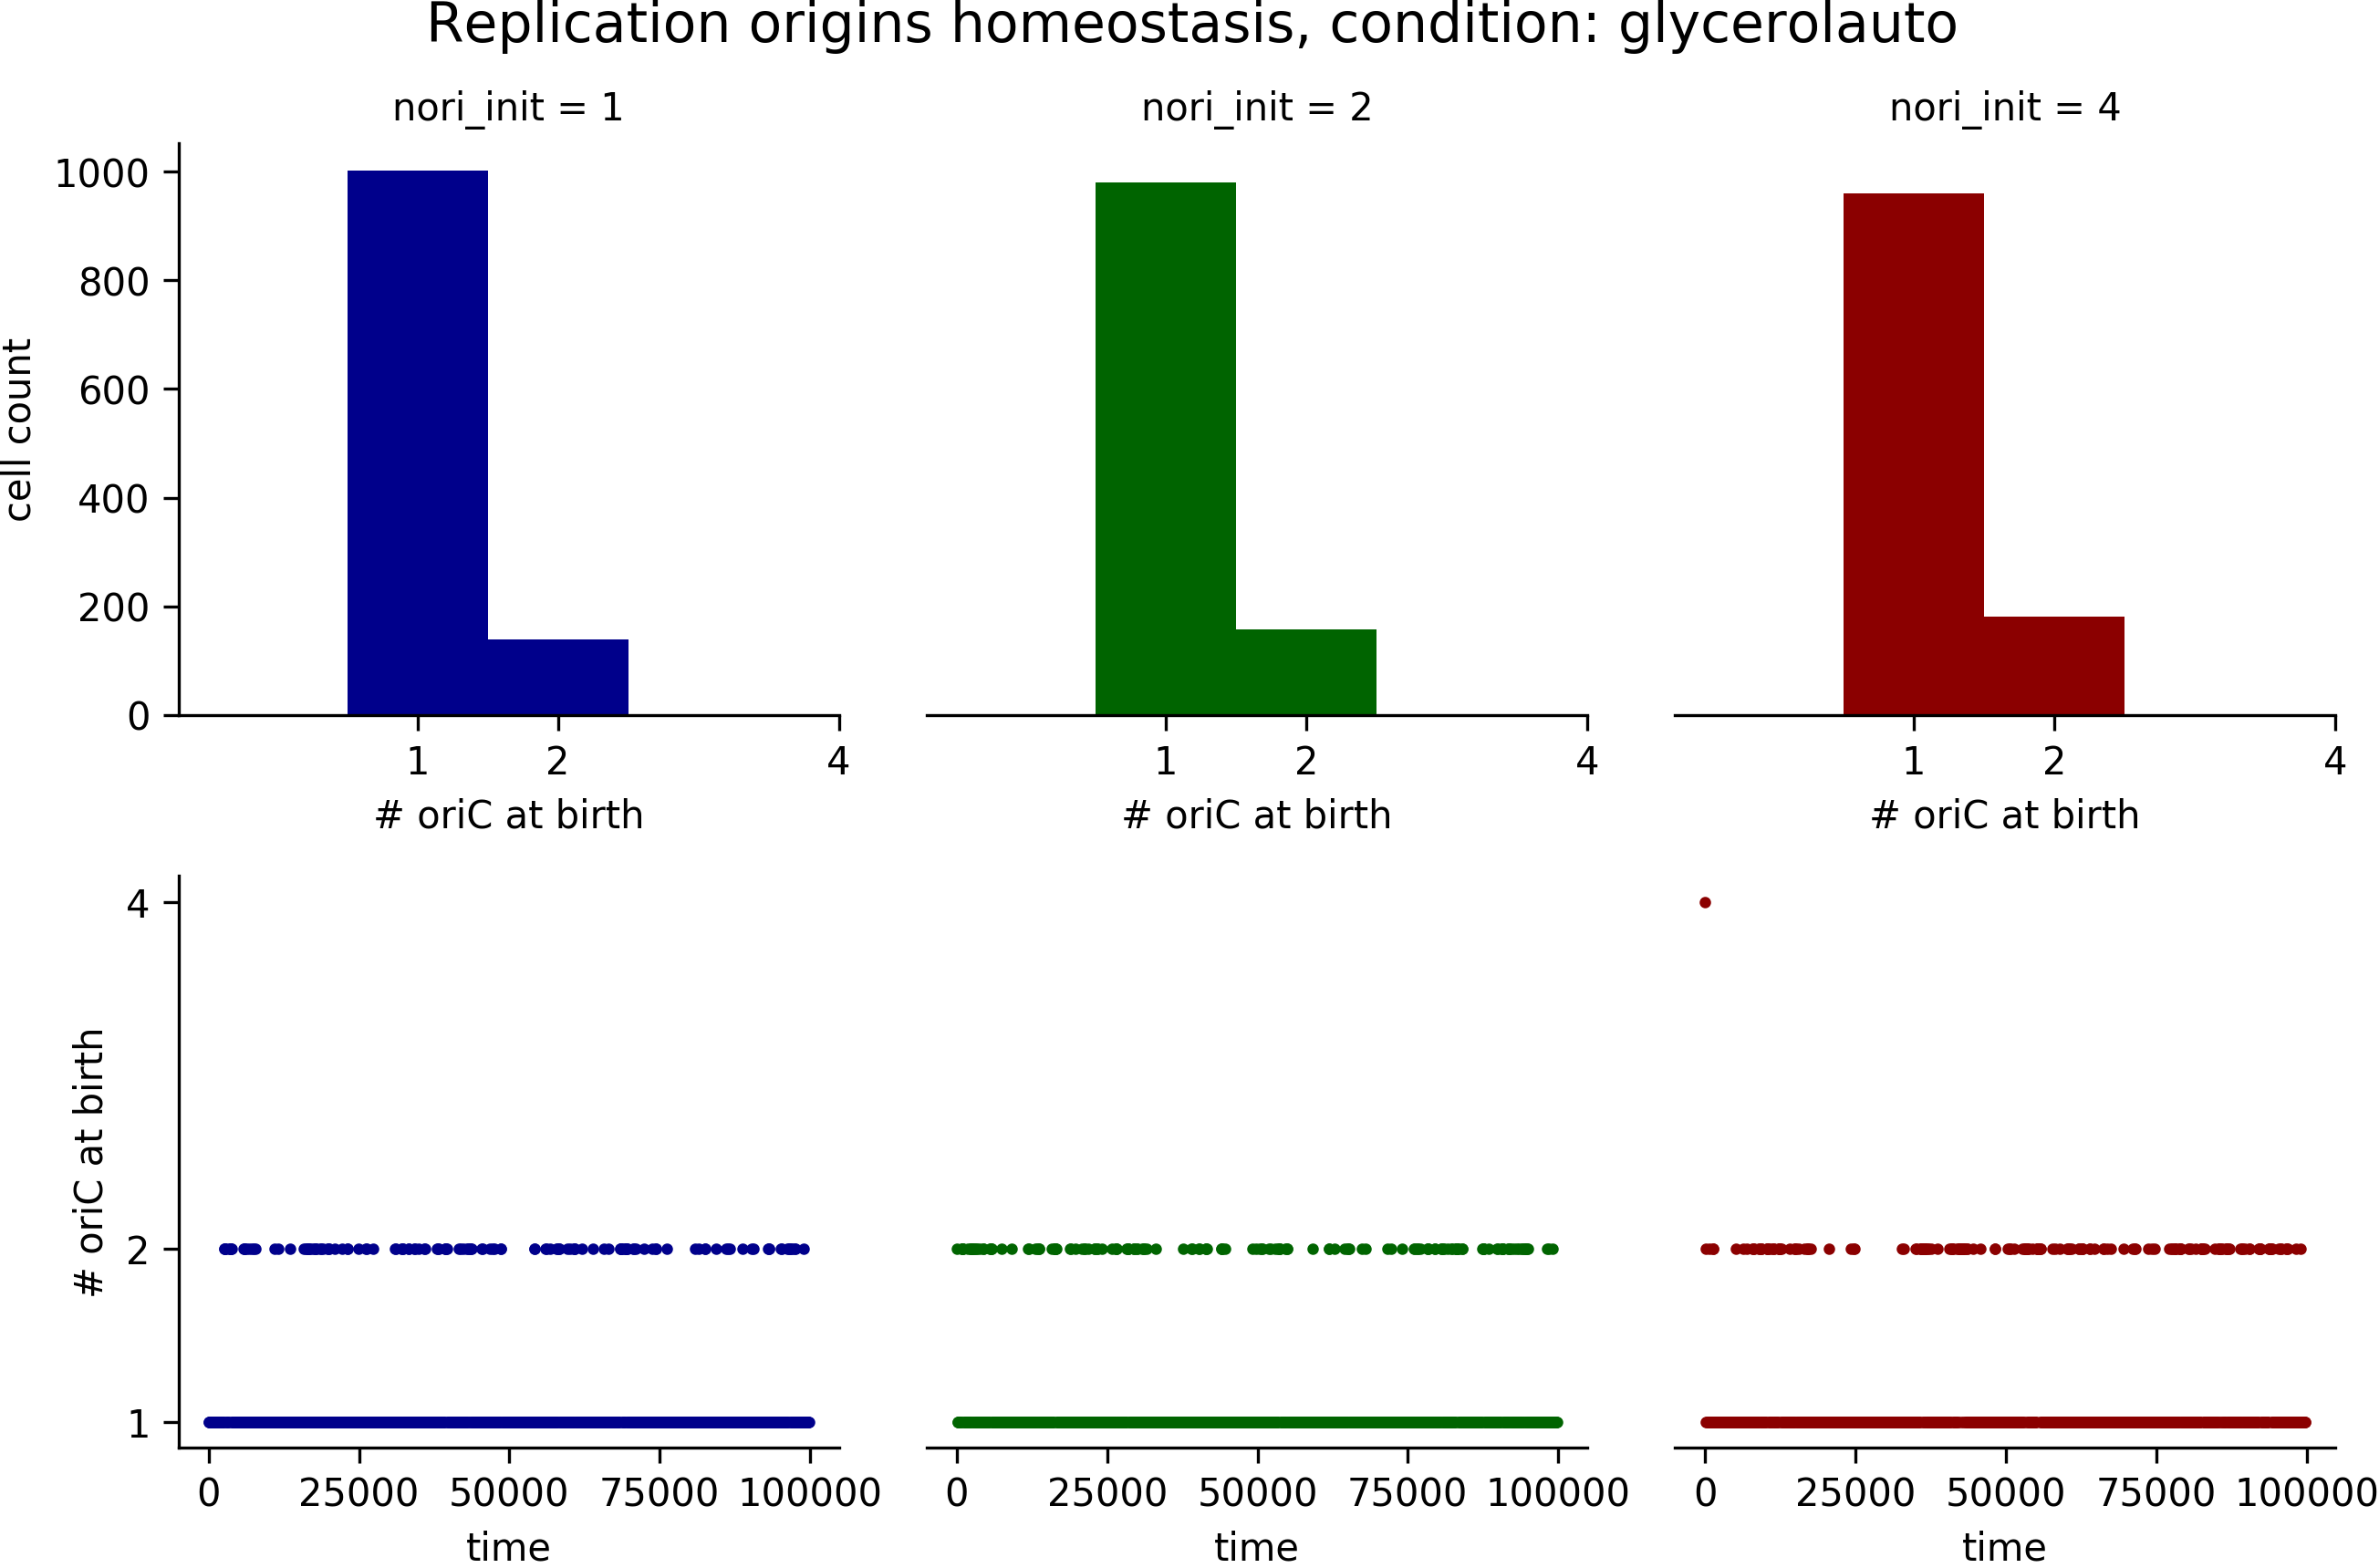

In [10]:
name = 'glycerolauto'
figname = "{:s}_{:s}".format(name, 'nori')
fpath = os.path.join(outputdir, "{:s}".format(figname)) + '.png'
# display one of the previous figures
Image(filename=fpath) 

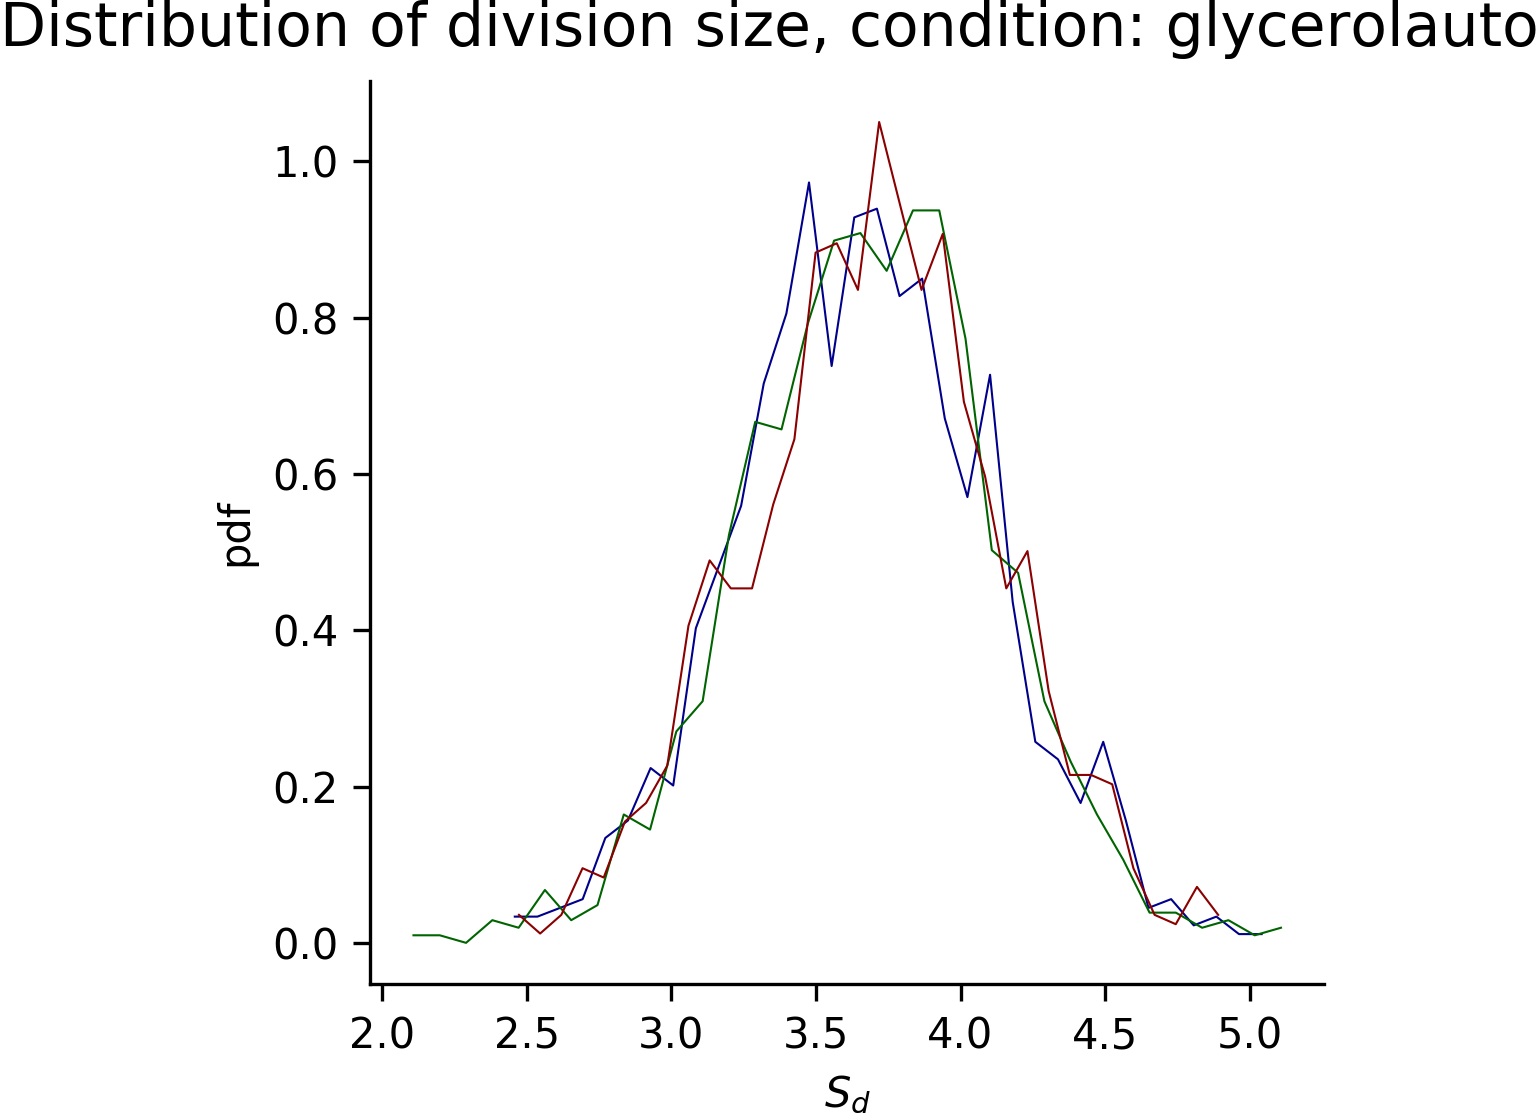

In [11]:
name = 'glycerolauto'
figname = "{:s}_{:s}".format(name, 'division_size')
fpath = os.path.join(outputdir, "{:s}".format(figname)) + '.png'
# display one of the previous figures
Image(filename=fpath) 

By contrast, the model proposed by Si & Le Treut and colleagues ensures homeostasis of the replication origins. The steady state doesn't depend on the initial condition in the simulations. As a result the steady-state division size remains independent of $n_\text{ori}$.